# Part 1:

# Histograms in OpenCV
### Histogram Calculation in OpenCV

In [1]:
import numpy as np
import cv2 as cv

img = cv.imread('home2.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
hist = cv.calcHist([img],[0],None,[256],[0,256])

### Histogram Calculation in Numpy

In [2]:
hist,bins = np.histogram(img.ravel(),256,[0,256])

### Plotting Histograms using Matplotlib

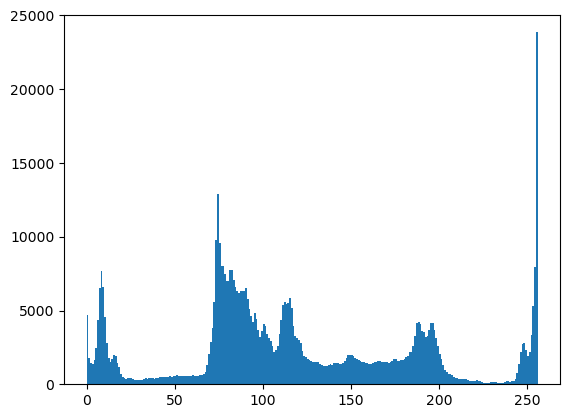

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('home2.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
plt.hist(img.ravel(),256,[0,256]); plt.show()

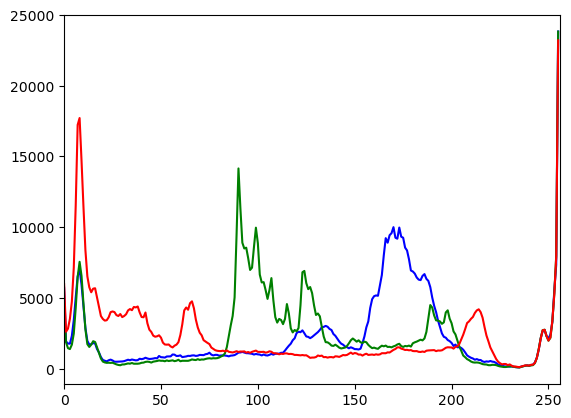

In [4]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('home2.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

### Application of Mask

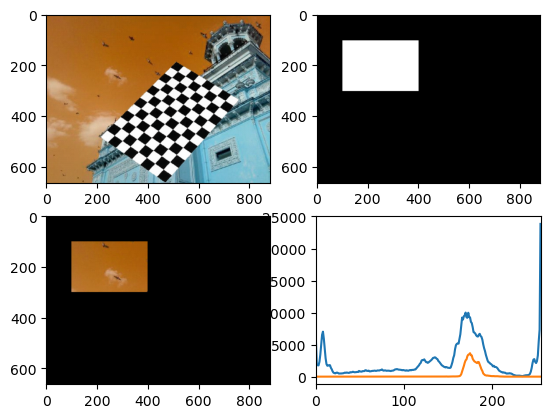

In [5]:
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

### Histogram Equalization

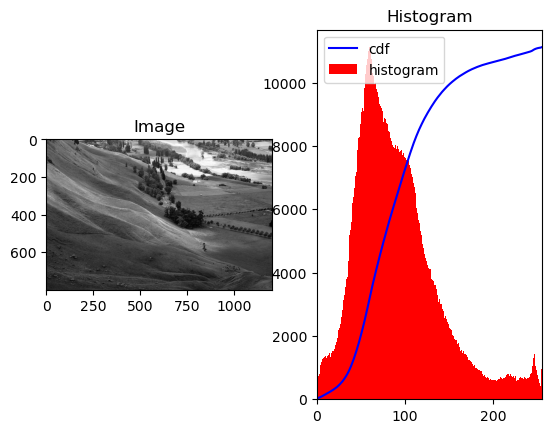

In [6]:
img = cv.imread('wiki.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"


hist, bins = np.histogram(img.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Image')

plt.subplot(122)
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.title('Histogram')

plt.show()

In [7]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [8]:
img2 = cdf[img]

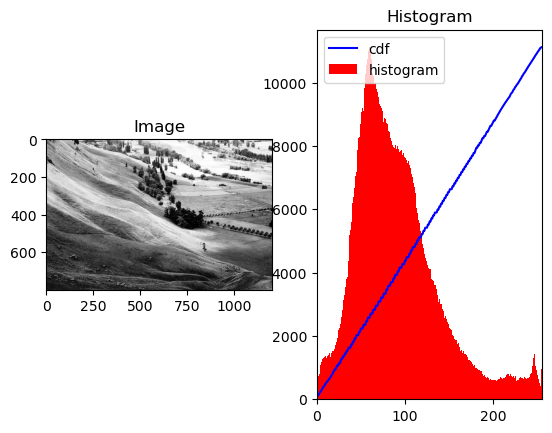

In [9]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.subplot(121)
plt.imshow(img2, cmap='gray')
plt.title('Image')

plt.subplot(122)
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.title('Histogram')

plt.show()

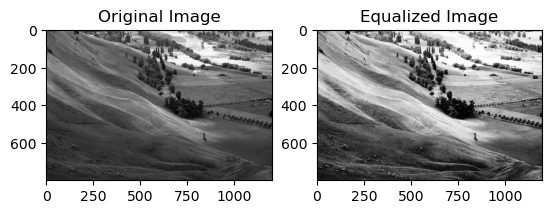

In [10]:
equ = cv.equalizeHist(img)
res = np.hstack((img, equ))  # stacking images side-by-side
cv.imwrite('res.png',res)


plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(equ, cmap='gray')
plt.title('Equalized Image')
plt.show()

### CLAHE (Contrast Limited Adaptive Histogram Equalization)

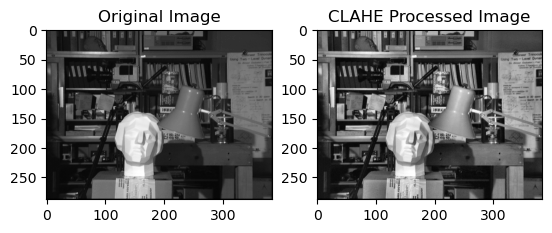

In [11]:
img = cv.imread('tsukuba_L.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
cv.imwrite('clahe_2.jpg',cl1)

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(cl1, cmap='gray')
plt.title('CLAHE Processed Image')

# Show the plots
plt.show()

### 2D Histogram in OpenCV

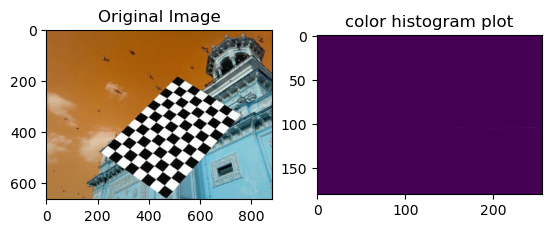

In [12]:
import numpy as np

img = cv.imread('home2.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
hist = cv.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )


plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(hist,interpolation = 'nearest')
plt.title('color histogram plot')

plt.show()

### OpenCV sample style

In [13]:
# Let's re-use home2
img = cv.imread('home2.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"

# Create the HSV color map
hsv_map = np.zeros((180, 256, 3), np.uint8)
h, s = np.indices(hsv_map.shape[:2])
hsv_map[:, :, 0] = h
hsv_map[:, :, 1] = s
hsv_map[:, :, 2] = 255
hsv_map = cv.cvtColor(hsv_map, cv.COLOR_HSV2BGR)
cv.imshow('hsv_map', hsv_map)

# Create the histogram window
cv.namedWindow('hist', 0)
hist_scale = 10

# Trackbar callback function
def set_scale(val):
    global hist_scale
    hist_scale = val

cv.createTrackbar('scale', 'hist', hist_scale, 32, set_scale)

# Process the image
small = cv.pyrDown(img)
hsv = cv.cvtColor(small, cv.COLOR_BGR2HSV)
dark = hsv[..., 2] < 32
hsv[dark] = 0
h = cv.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
h = np.clip(h * 0.005 * hist_scale, 0, 1)
vis = hsv_map * h[:, :, np.newaxis] / 255.0
cv.imshow('hist', vis)

cv.imshow('Home2', img)

cv.waitKey(0)
cv.destroyAllWindows()

### Fourier Transform in OpenCV

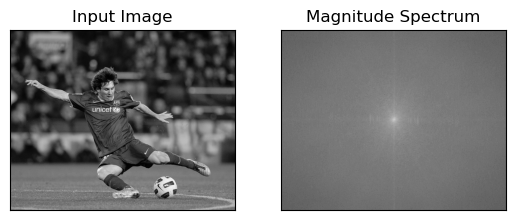

In [14]:
img = cv.imread('messi5.JPG', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

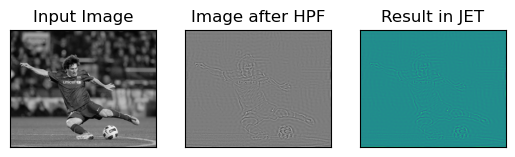

In [15]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
fshift[crow-30:crow+31, ccol-30:ccol+31] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

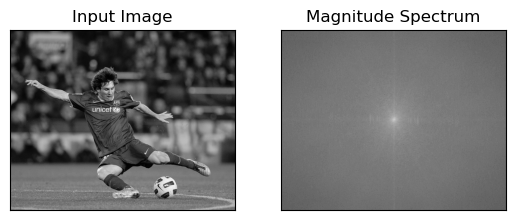

In [16]:
img = cv.imread('messi5.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

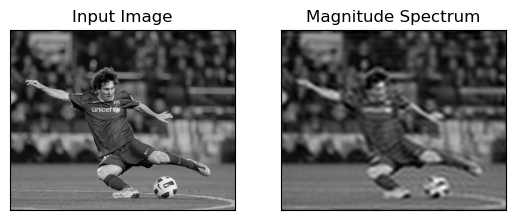

In [17]:
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)  # Convert to integers
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
# apply mask and inverse DFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0], img_back[:,:,1])
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

### Performance Optimization of DFT

In [18]:
rows,cols = img.shape
print("{} {}".format(rows,cols))

nrows = cv.getOptimalDFTSize(rows)
ncols = cv.getOptimalDFTSize(cols)
print("{} {}".format(nrows,ncols))

1280 1600
1280 1600


In [19]:
nimg = np.zeros((nrows,ncols))
nimg[:rows,:cols] = img

In [20]:
%timeit fft1 = np.fft.fft2(img)
%timeit fft2 = np.fft.fft2(img,[nrows,ncols])

67.4 ms ± 4.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
65.9 ms ± 2.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


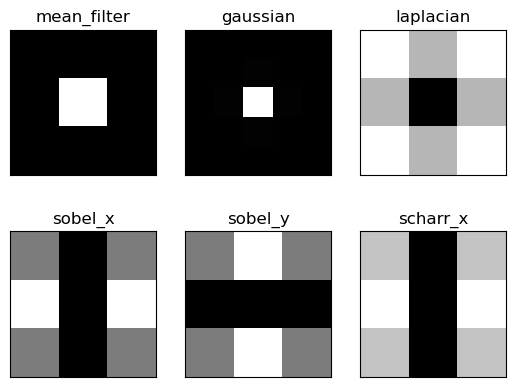

In [21]:
# simple averaging filter without scaling parameter

mean_filter = np.ones((3,3))

# creating a gaussian filter

x = cv.getGaussianKernel(5,10)
gaussian = x*x.T

# different edge detecting filters
# scharr in x-direction

scharr = np.array([[-3, 0, 3],
[-10,0,10],
[-3, 0, 3]])

# sobel in x direction

sobel_x= np.array([[-1, 0, 1],
[-2, 0, 2],
[-1, 0, 1]])

# sobel in y direction

sobel_y= np.array([[-1,-2,-1],
[0, 0, 0],
[1, 2, 1]])

# laplacian

laplacian=np.array([[0, 1, 0],
[1,-4, 1],
[0, 1, 0]])
filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
plt.show()

### Template Matching in OpenCV 

We manually added a template of Messi's face since it was missing

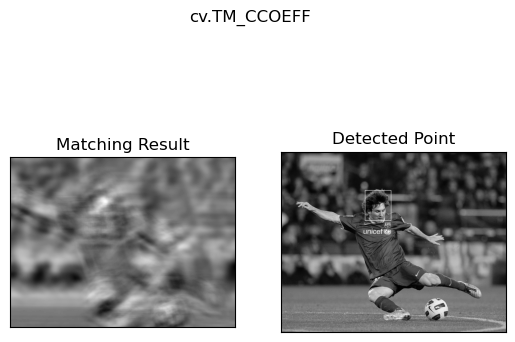

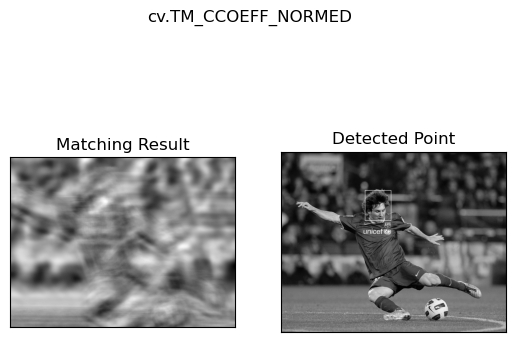

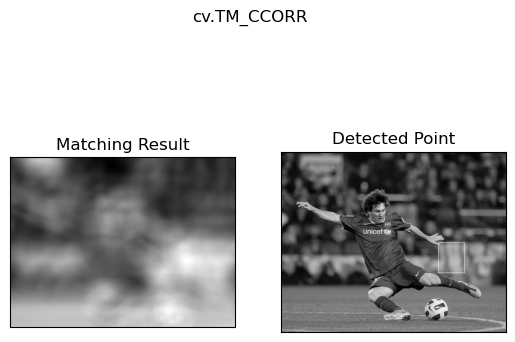

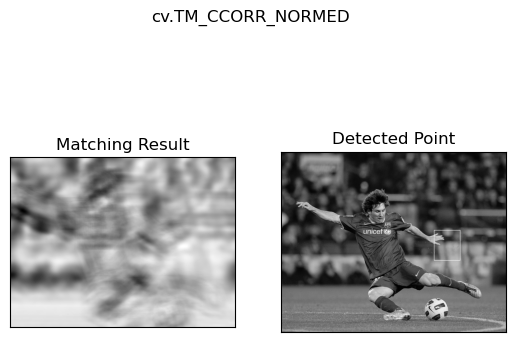

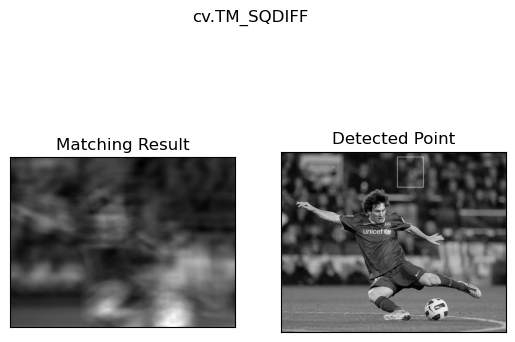

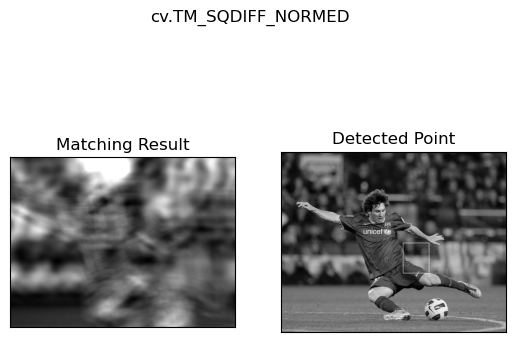

In [22]:
img2 = img.copy()
template = cv.imread('template.jpg', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
# If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)   
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

### Template Matching with Multiple Objects

we think the mario_coin wasn't the correct one we tried to create one ourselve but it wasn't really concluding

In [23]:
img_rgb = cv.imread('mario.png')
assert img_rgb is not None, "file could not be read, check with os.path.exists()"
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('mario_coin.png', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
cv.imwrite('res.png',img_rgb)

True

# Part 2

Mean Intensity: 119.08851156069365
Standard Deviation: 36.99996573450949


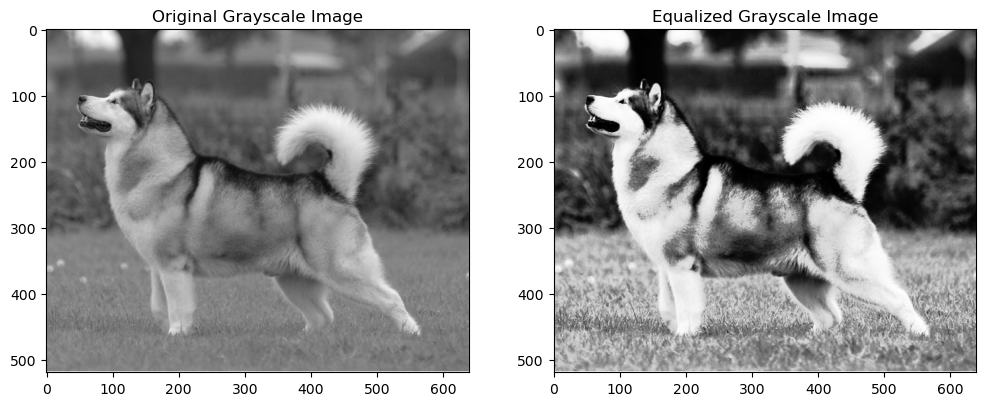

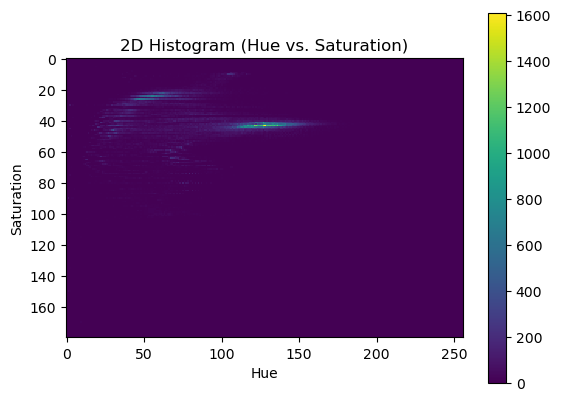

In [24]:
import cv2

# 1. Load an image
image = cv2.imread('Alaskan_Malamute.jpg')

# 2. Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 3. Calculate and plot the histogram of the grayscale image
hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# 4. Analyze the histogram
mean_intensity = np.mean(gray_image)
std_deviation = np.std(gray_image)
print(f"Mean Intensity: {mean_intensity}")
print(f"Standard Deviation: {std_deviation}")

# 5. Apply histogram equalization
equalized_image = cv2.equalizeHist(gray_image)

# 6. Plot original and equalized images side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB), cmap='gray')
plt.title('Original Grayscale Image')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2RGB), cmap='gray')
plt.title('Equalized Grayscale Image')
plt.show()

# 7. Load a color image and convert it to HSV
color_image = cv2.imread('Alaskan_Malamute.jpg')
hsv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)

# 8. Calculate and plot a 2D histogram of Hue and Saturation channels
hist_2d = cv2.calcHist([hsv_image], [0, 1], None, [180, 256], [0, 180, 0, 256])

# 9. Visualize the 2D histogram as a heatmap
plt.imshow(hist_2d, interpolation='nearest')
plt.title('2D Histogram (Hue vs. Saturation)')
plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.colorbar()
plt.show()

# 10. Select a region of interest (ROI) and convert to HSV
roi = hsv_image[100:300, 150:350]
roi_hist = cv2.calcHist([roi], [0, 1], None, [180, 256], [0, 180, 0, 256])
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

# 11. Calculate histogram backprojection and threshold
backproj = cv2.calcBackProject([hsv_image], [0, 1], roi_hist, [0, 180, 0, 256], 1)
ret, thresholded = cv2.threshold(backproj, 50, 255, cv2.THRESH_BINARY)

# 12. Display the original image with the segmented object outlined
result = cv2.bitwise_and(color_image, color_image, mask=thresholded)
cv2.imshow('Segmented Image', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 13. Draw a rectangle around the matched region
template_height, template_width = template.shape[:2]
top_left = max_loc
bottom_right = (top_left[0] + template_width, top_left[1] + template_height)
cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)  # Draw rectangle

# 14. Perform 2D Fourier Transform on the grayscale image
f_transform = np.fft.fft2(gray_image)
f_transform_shifted = np.fft.fftshift(f_transform)
magnitude_spectrum = np.abs(f_transform_shifted)
